In [ ]:
import pandas as pd
df_original_num = pd.read_csv('df_original_num_data_0115.csv')

import warnings
warnings.filterwarnings('ignore')

**Split train and test data**

In [ ]:
from sklearn.model_selection import train_test_split
train_raw, test_raw = train_test_split(df_original_num, test_size = 0.2, shuffle=False)

In [ ]:
features = list(train_raw.columns)
target = 'party_label'
features.remove(target)

X_train = train_raw[features]
y_train = train_raw[target]

X_test = test_raw[features]
y_test = test_raw[target]

**Models**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, average_precision_score, precision_score, classification_report, confusion_matrix, roc_auc_score

# Initializing and training a Logistic Regression model
steps_lg = [('rescale', MinMaxScaler()),
         ('logr', LogisticRegression(random_state=42))]
model_lg = Pipeline(steps_lg)
model_lg = model_lg.fit(X_train, y_train)  # Assuming X_train is your training data

y_train_pred = model_lg.predict(X_train)
y_test_pred = model_lg.predict(X_test)

# Calculate metrics
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

classification_report_train = classification_report(y_train, y_train_pred)
classification_report_test = classification_report(y_test, y_test_pred)

confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

roc_auc_train = roc_auc_score(y_train, model_lg.predict_proba(X_train)[:, 1])
roc_auc_test = roc_auc_score(y_test, model_lg.predict_proba(X_test)[:, 1])

pr_auc_train = average_precision_score(y_train, model_lg.predict_proba(X_train)[:, 1])
pr_auc_test = average_precision_score(y_test, model_lg.predict_proba(X_test)[:, 1])

# Printing the metrics
print(f'Precision_test: {precision_test}')
print(f'Precision_train: {precision_train}')
print(f'Accuracy_test: {accuracy_test}')
print(f'Accuracy_train: {accuracy_train}')
print('Classification Report_test:\n', classification_report_test)
print('Classification Report_train:\n', classification_report_train)
print('Confusion Matrix_test:\n', confusion_matrix_test)
print('Confusion Matrix_train:\n', confusion_matrix_train)
print(f'ROC AUC Score_test: {roc_auc_test}')
print(f'ROC AUC Score_train: {roc_auc_train}')
print(f'PR AUC Score_test: {pr_auc_test}')
print(f'PR AUC Score_train: {pr_auc_train}')

Precision_test: 0.5496219078401356
Precision_train: 0.5721997982137325
Accuracy_test: 0.5493775326836798
Accuracy_train: 0.5677030637763654
Classification Report_test:
               precision    recall  f1-score   support

           0       0.55      0.06      0.11    604233
           1       0.55      0.96      0.70    722423

    accuracy                           0.55   1326656
   macro avg       0.55      0.51      0.41   1326656
weighted avg       0.55      0.55      0.43   1326656

Classification Report_train:
               precision    recall  f1-score   support

           0       0.49      0.06      0.10   2285958
           1       0.57      0.95      0.72   3020663

    accuracy                           0.57   5306621
   macro avg       0.53      0.51      0.41   5306621
weighted avg       0.53      0.57      0.45   5306621

Confusion Matrix_test:
 [[ 38777 565456]
 [ 32365 690058]]
Confusion Matrix_train:
 [[ 133243 2152715]
 [ 141321 2879342]]
ROC AUC Score_test: 0.54

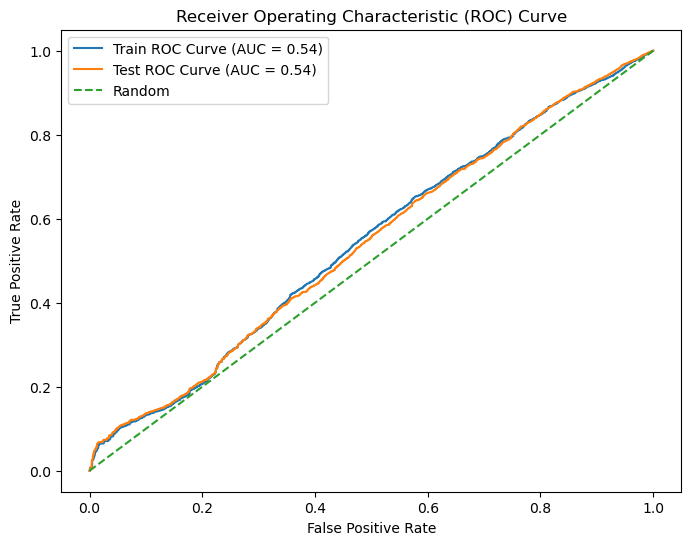

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve for train and test sets
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, model_lg.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, model_lg.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC Curve (AUC = {:.2f})'.format(auc(fpr_train, tpr_train)))
plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = {:.2f})'.format(auc(fpr_test, tpr_test)))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

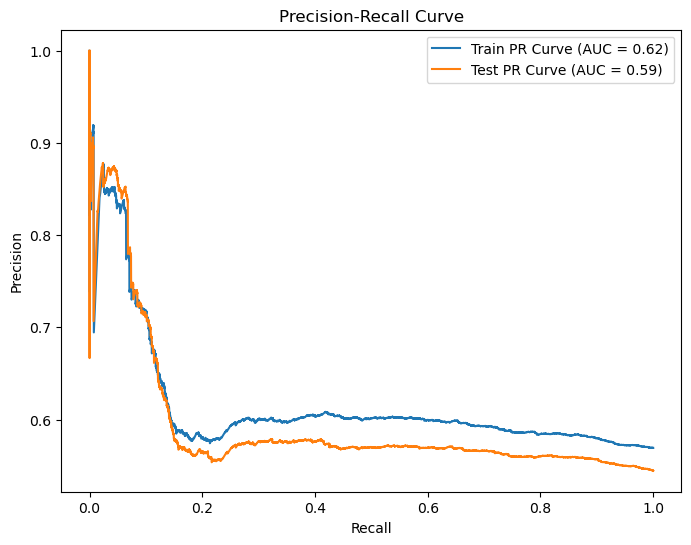

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Compute Precision-Recall curve for train and test sets
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, model_lg.predict_proba(X_train)[:, 1])
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, model_lg.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_train, precision_train, label='Train PR Curve (AUC = {:.2f})'.format(auc(recall_train, precision_train)))
plt.plot(recall_test, precision_test, label='Test PR Curve (AUC = {:.2f})'.format(auc(recall_test, precision_test)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
coefficients = model_lg.steps[1][1].coef_[0]
coefficients

array([-0.38837247, -0.71759763, -0.12973173,  0.02215509])

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

steps_rf = [('rescale', MinMaxScaler()),
            ('rf', RandomForestClassifier(random_state=42))]
model_rf = Pipeline(steps_rf)
model_rf.fit(X_train, y_train)

# Make predictions on train and test sets
y_train_pred = model_rf.predict(X_train)
y_test_pred = model_rf.predict(X_test)

# Calculate metrics
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

classification_report_train = classification_report(y_train, y_train_pred)
classification_report_test = classification_report(y_test, y_test_pred)

confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

roc_auc_train = roc_auc_score(y_train, model_rf.predict_proba(X_train)[:, 1])
roc_auc_test = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])

pr_auc_train = average_precision_score(y_train, model_rf.predict_proba(X_train)[:, 1])
pr_auc_test = average_precision_score(y_test, model_rf.predict_proba(X_test)[:, 1])

# Printing the metrics
print(f'Precision_test: {precision_test}')
print(f'Precision_train: {precision_train}')
print(f'Accuracy_test: {accuracy_test}')
print(f'Accuracy_train: {accuracy_train}')
print('Classification Report_test:\n', classification_report_test)
print('Classification Report_train:\n', classification_report_train)
print('Confusion Matrix_test:\n', confusion_matrix_test)
print('Confusion Matrix_train:\n', confusion_matrix_train)
print(f'ROC AUC Score_test: {roc_auc_test}')
print(f'ROC AUC Score_train: {roc_auc_train}')
print(f'PR AUC Score_test: {pr_auc_test}')
print(f'PR AUC Score_train: {pr_auc_train}')

Precision_test: 0.9471252082176569
Precision_train: 0.9866885491114055
Accuracy_test: 0.9410510335761494
Accuracy_train: 0.9821115922919689
Classification Report_test:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94    604233
           1       0.95      0.94      0.95    722423

    accuracy                           0.94   1326656
   macro avg       0.94      0.94      0.94   1326656
weighted avg       0.94      0.94      0.94   1326656

Classification Report_train:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98   2285958
           1       0.99      0.98      0.98   3020663

    accuracy                           0.98   5306621
   macro avg       0.98      0.98      0.98   5306621
weighted avg       0.98      0.98      0.98   5306621

Confusion Matrix_test:
 [[566142  38091]
 [ 40114 682309]]
Confusion Matrix_train:
 [[2245947   40011]
 [  54916 2965747]]
ROC AUC Score_test: 0.98

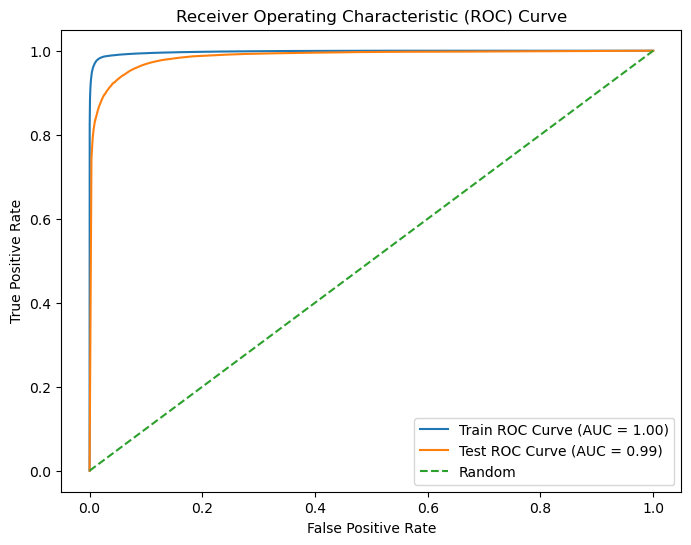

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve for train and test sets
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, model_rf.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC Curve (AUC = {:.2f})'.format(auc(fpr_train, tpr_train)))
plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = {:.2f})'.format(auc(fpr_test, tpr_test)))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

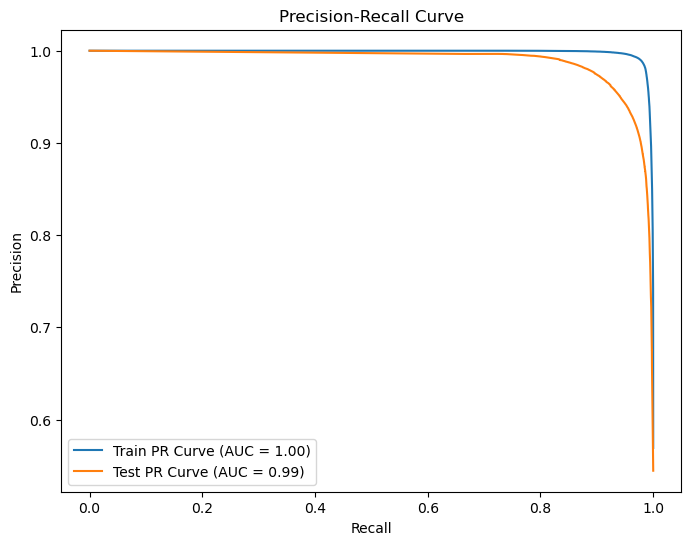

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Compute Precision-Recall curve for train and test sets
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, model_rf.predict_proba(X_train)[:, 1])
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, model_rf.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_train, precision_train, label='Train PR Curve (AUC = {:.2f})'.format(auc(recall_train, precision_train)))
plt.plot(recall_test, precision_test, label='Test PR Curve (AUC = {:.2f})'.format(auc(recall_test, precision_test)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

[0.05567817 0.11736751 0.47695062 0.3500037 ]


([<matplotlib.axis.XTick at 0x1700a7bd0>,
 [Text(0, 0, 'State_Num'),
  Text(1, 0, 'City_Num'),
  Text(2, 0, 'EMPLOYER_num'),
  Text(3, 0, 'OCCUPATION_num')])

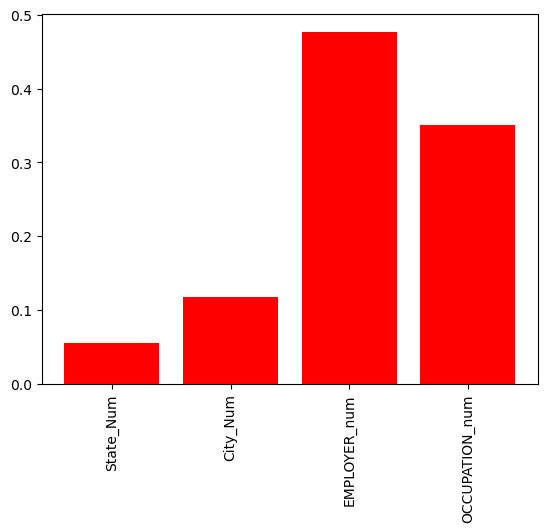

In [ ]:
importances_rf = model_rf.steps[1][1].feature_importances_
print(importances_rf)

plt.bar(range(len(importances_rf)), importances_rf, color="r", align = "center")
plt.xticks(range(len(importances_rf)), ['State_Num', 'City_Num', 'EMPLOYER_num', 'OCCUPATION_num'], rotation = 90)

**XGboost**

In [ ]:
from xgboost.sklearn import XGBClassifier

steps_xg = [('Rescale', MinMaxScaler()),
            ('xgbr', XGBClassifier(random_state=42))]
model_xg = Pipeline(steps_xg)
model_xg.fit(X_train, y_train)

# Make predictions on train and test sets
y_train_pred = model_xg.predict(X_train)
y_test_pred = model_xg.predict(X_test)


# Calculate metrics
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

classification_report_train = classification_report(y_train, y_train_pred)
classification_report_test = classification_report(y_test, y_test_pred)

confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

roc_auc_train = roc_auc_score(y_train, model_xg.predict_proba(X_train)[:, 1])
roc_auc_test = roc_auc_score(y_test, model_xg.predict_proba(X_test)[:, 1])

pr_auc_train = average_precision_score(y_train, model_xg.predict_proba(X_train)[:, 1])
pr_auc_test = average_precision_score(y_test, model_xg.predict_proba(X_test)[:, 1])

# Printing the metrics
print(f'Precision_test: {precision_test}')
print(f'Precision_train: {precision_train}')
print(f'Accuracy_test: {accuracy_test}')
print(f'Accuracy_train: {accuracy_train}')
print('Classification Report_test:\n', classification_report_test)
print('Classification Report_train:\n', classification_report_train)
print('Confusion Matrix_test:\n', confusion_matrix_test)
print('Confusion Matrix_train:\n', confusion_matrix_train)
print(f'ROC AUC Score_test: {roc_auc_test}')
print(f'ROC AUC Score_train: {roc_auc_train}')
print(f'PR AUC Score_test: {pr_auc_test}')
print(f'PR AUC Score_train: {pr_auc_train}')

Precision_test: 0.8890281762199026
Precision_train: 0.9064042697900597
Accuracy_test: 0.8933551727049062
Accuracy_train: 0.9102344033990745
Classification Report_test:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88    604233
           1       0.89      0.92      0.90    722423

    accuracy                           0.89   1326656
   macro avg       0.89      0.89      0.89   1326656
weighted avg       0.89      0.89      0.89   1326656

Classification Report_train:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89   2285958
           1       0.91      0.94      0.92   3020663

    accuracy                           0.91   5306621
   macro avg       0.91      0.91      0.91   5306621
weighted avg       0.91      0.91      0.91   5306621

Confusion Matrix_test:
 [[521375  82858]
 [ 58623 663800]]
Confusion Matrix_train:
 [[1992978  292980]
 [ 183372 2837291]]
ROC AUC Score_test: 0.96

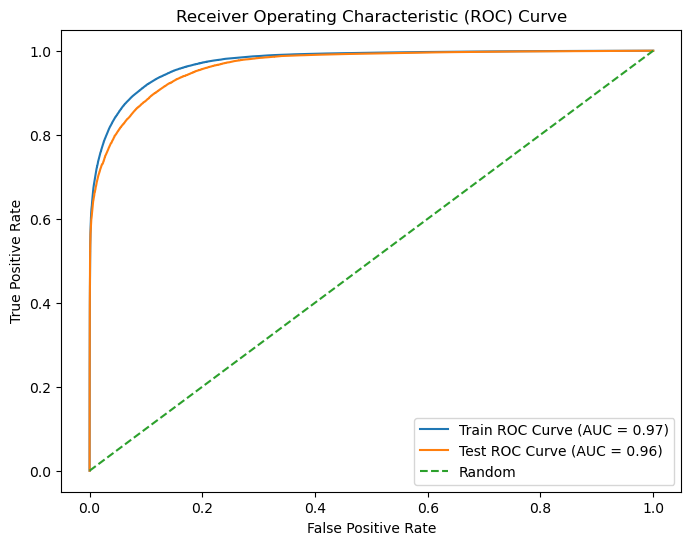

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve for train and test sets
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, model_xg.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, model_xg.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC Curve (AUC = {:.2f})'.format(auc(fpr_train, tpr_train)))
plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = {:.2f})'.format(auc(fpr_test, tpr_test)))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

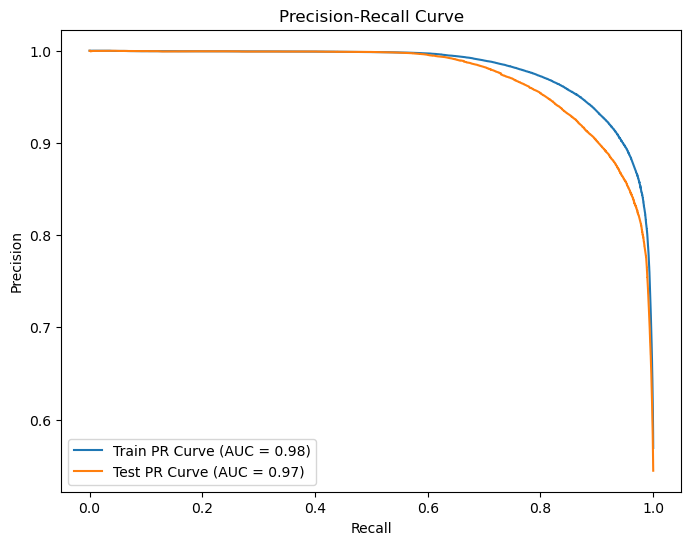

In [ ]:
# Compute Precision-Recall curve for train and test sets
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, model_xg.predict_proba(X_train)[:, 1])
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, model_xg.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_train, precision_train, label='Train PR Curve (AUC = {:.2f})'.format(auc(recall_train, precision_train)))
plt.plot(recall_test, precision_test, label='Test PR Curve (AUC = {:.2f})'.format(auc(recall_test, precision_test)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

[0.05107645 0.03404446 0.732664   0.18221515]


([<matplotlib.axis.XTick at 0x170037210>,
 [Text(0, 0, 'State_Num'),
  Text(1, 0, 'City_Num'),
  Text(2, 0, 'EMPLOYER_num'),
  Text(3, 0, 'OCCUPATION_num')])

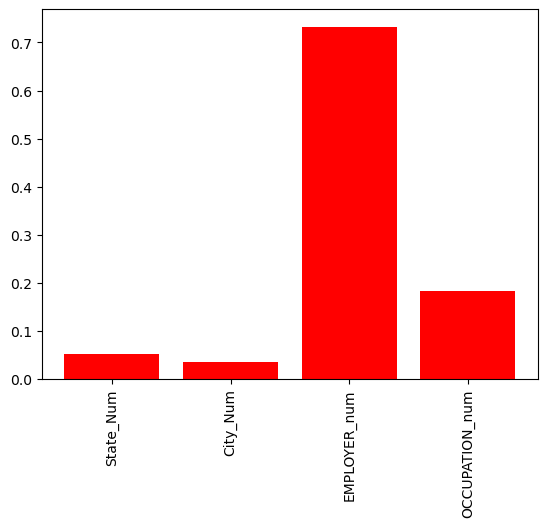

In [ ]:
import matplotlib.pylab as plt

importances_xg = model_xg.steps[1][1].feature_importances_
print(importances_xg)

plt.bar(range(len(importances_xg)), importances_xg, color="r", align = "center")
plt.xticks(range(len(importances_xg)), ['State_Num', 'City_Num', 'EMPLOYER_num', 'OCCUPATION_num'], rotation = 90)

**Tune hyperparameters with k-fold cross validation**

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, roc_auc_score

# Assuming you have created an XGBoost Classifier as 'xgbc'

# Create a pipeline with XGBoost Classifier
pipe_xgbc = Pipeline([('Rescale', MinMaxScaler()),
                      ('xgbc', XGBClassifier(random_state=42))])

# Define the parameters for grid search
parameters_xg = {
    'xgbc__learning_rate': [0.05, 0.1, 0.2, 0.3],
    'xgbc__n_estimators': [100, 300, 500],
    'xgbc__max_depth': [3, 5, 10, 15, 20],
}

# Create GridSearchCV with scoring based on precision
grid_search_xg = GridSearchCV(pipe_xgbc, parameters_xg, cv=5, scoring='precision', n_jobs=-1)

# Fit GridSearchCV to your data
grid_search_xg.fit(X_train, y_train)  # X_train and y_train are your training data

# Get the best parameters and best score
best_params_xg = grid_search_xg.best_params_
best_precision_xg = grid_search_xg.best_score_

# Train a new model using the best parameters (optional)
best_model_xg = grid_search_xg.best_estimator_

In [ ]:
best_params_xg

{'xgbc__learning_rate': 0.3, 'xgbc__max_depth': 20, 'xgbc__n_estimators': 500}

In [ ]:
import xgboost as xgb
from sklearn.metrics import precision_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score, average_precision_score, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

# Fit the best model using the best parameters found during grid search
best_model_xg.fit(X_train, y_train)

# Make predictions on train and test sets
y_train_pred = best_model_xg.predict(X_train)
y_test_pred = best_model_xg.predict(X_test)


# Calculate metrics
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

classification_report_train = classification_report(y_train, y_train_pred)
classification_report_test = classification_report(y_test, y_test_pred)

confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

roc_auc_train = roc_auc_score(y_train, best_model_xg.predict_proba(X_train)[:, 1])
roc_auc_test = roc_auc_score(y_test, best_model_xg.predict_proba(X_test)[:, 1])

pr_auc_train = average_precision_score(y_train, best_model_xg.predict_proba(X_train)[:, 1])
pr_auc_test = average_precision_score(y_test, best_model_xg.predict_proba(X_test)[:, 1])

# Printing the metrics
print(f'Precision_test: {precision_test}')
print(f'Precision_train: {precision_train}')
print(f'Accuracy_test: {accuracy_test}')
print(f'Accuracy_train: {accuracy_train}')
print('Classification Report_test:\n', classification_report_test)
print('Classification Report_train:\n', classification_report_train)
print('Confusion Matrix_test:\n', confusion_matrix_test)
print('Confusion Matrix_train:\n', confusion_matrix_train)
print(f'ROC AUC Score_test: {roc_auc_test}')
print(f'ROC AUC Score_train: {roc_auc_train}')
print(f'PR AUC Score_test: {pr_auc_test}')
print(f'PR AUC Score_train: {pr_auc_train}')

Precision_test: 0.9431102187513866
Precision_train: 0.9806129333523885
Accuracy_test: 0.93721431931111
Accuracy_train: 0.9757817639511094
Classification Report_test:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93    604233
           1       0.94      0.94      0.94    722423

    accuracy                           0.94   1326656
   macro avg       0.94      0.94      0.94   1326656
weighted avg       0.94      0.94      0.94   1326656

Classification Report_train:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97   2285958
           1       0.98      0.98      0.98   3020663

    accuracy                           0.98   5306621
   macro avg       0.98      0.98      0.98   5306621
weighted avg       0.98      0.98      0.98   5306621

Confusion Matrix_test:
 [[563205  41028]
 [ 42267 680156]]
Confusion Matrix_train:
 [[2227626   58332]
 [  70185 2950478]]
ROC AUC Score_test: 0.9802

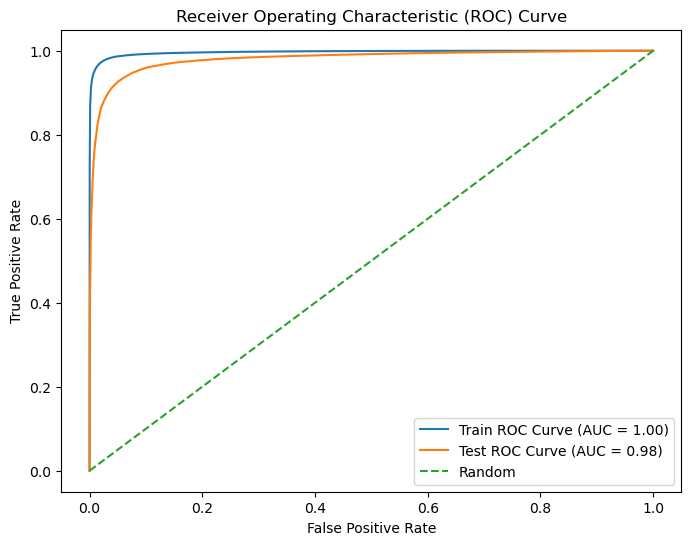

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve for train and test sets
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, best_model_xg.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, best_model_xg.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC Curve (AUC = {:.2f})'.format(auc(fpr_train, tpr_train)))
plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = {:.2f})'.format(auc(fpr_test, tpr_test)))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

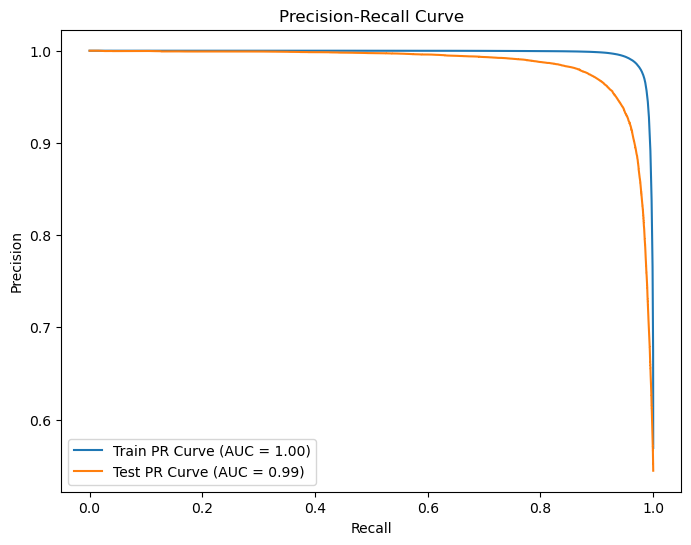

In [ ]:
# Compute Precision-Recall curve for train and test sets
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, best_model_xg.predict_proba(X_train)[:, 1])
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, best_model_xg.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_train, precision_train, label='Train PR Curve (AUC = {:.2f})'.format(auc(recall_train, precision_train)))
plt.plot(recall_test, precision_test, label='Test PR Curve (AUC = {:.2f})'.format(auc(recall_test, precision_test)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

[0.10940201 0.08419082 0.6172025  0.18920472]


([<matplotlib.axis.XTick at 0x170999b50>,
 [Text(0, 0, 'State_Num'),
  Text(1, 0, 'City_Num'),
  Text(2, 0, 'EMPLOYER_num'),
  Text(3, 0, 'OCCUPATION_num')])

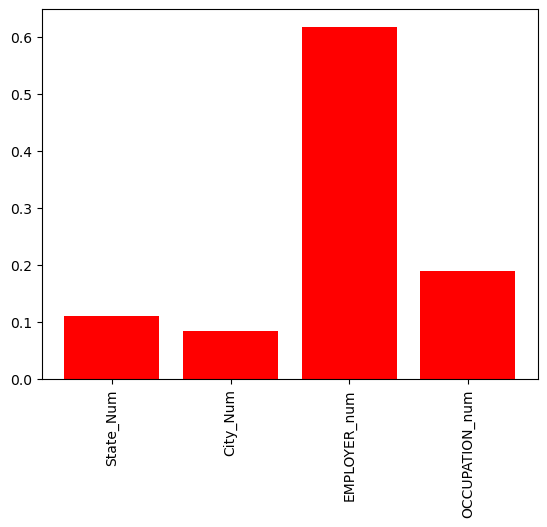

In [ ]:
import matplotlib.pylab as plt

importances_xg_best = best_model_xg.steps[1][1].feature_importances_
print(importances_xg_best)

plt.bar(range(len(importances_xg_best)), importances_xg_best, color="r", align = "center")
plt.xticks(range(len(importances_xg_best)), ['State_Num', 'City_Num', 'EMPLOYER_num', 'OCCUPATION_num'], rotation = 90)

**use 'df_test_original_num_data_0115.csv' te test the best model**

In [ ]:
# Load the test dataset
df_test = pd.read_csv('df_test_original_num_data_0115.csv')  # Replace 'df_test_DS0108_drop.csv' with your file path

In [ ]:
df_test.isna().sum()

State_Num         0
City_Num          0
EMPLOYER_num      0
OCCUPATION_num    0
party_label       0
dtype: int64

In [ ]:
df_test_2 = pd.DataFrame()
df_test_2.loc[:, :] = 0
df_test_2 = df_test[['State_Num', 'City_Num', 'EMPLOYER_num', 'OCCUPATION_num', 'party_label']]
df_test_2.head()

,State_Num,City_Num,EMPLOYER_num,OCCUPATION_num,party_label
0,1,1,2,2,1
1,2,2,43518,15,1
2,3,3,2,2,1
3,4,4,4,1169,1
4,4,5,2,2,1


In [ ]:
# Assuming the target column is named 'target', create X_test and y_test
X_test_2 = df_test.drop('party_label', axis=1)  # Remove the target column from features
y_test_2 = df_test['party_label']  # Target column

# Make predictions on train and test sets
y_test_pred_2 = best_model_xg.predict(X_test_2)


# Calculate metrics
precision_test_2 = precision_score(y_test_2, y_test_pred_2)
accuracy_test_2 = accuracy_score(y_test_2, y_test_pred_2)
classification_report_test_2 = classification_report(y_test_2, y_test_pred_2)
confusion_matrix_test_2 = confusion_matrix(y_test_2, y_test_pred_2)
roc_auc_test_2 = roc_auc_score(y_test_2, best_model_xg.predict_proba(X_test_2)[:, 1])
pr_auc_test_2 = average_precision_score(y_test_2, best_model_xg.predict_proba(X_test_2)[:, 1])

# Printing the metrics
print(f'Precision_test: {precision_test}')
print(f'Accuracy_test: {accuracy_test}')
print('Classification Report_test:\n', classification_report_test)
print('Confusion Matrix_test:\n', confusion_matrix_test)
print(f'ROC AUC Score_test: {roc_auc_test}')
print(f'PR AUC Score_test: {pr_auc_test}')

Precision_test: [0.54454433 0.54454556 0.54454638 ... 1.         1.         1.        ]
Accuracy_test: 0.93721431931111
Classification Report_test:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93    604233
           1       0.94      0.94      0.94    722423

    accuracy                           0.94   1326656
   macro avg       0.94      0.94      0.94   1326656
weighted avg       0.94      0.94      0.94   1326656

Confusion Matrix_test:
 [[563205  41028]
 [ 42267 680156]]
ROC AUC Score_test: 0.9802577340896904
PR AUC Score_test: 0.9850462634782726
